# Python Iterators, Idioms, Performance and Complexity

01 Oct 2022 By Jon Chun

# Configure Notebook

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import time
from random import random, shuffle

In [ ]:
import itertools

# Build Data Sets



## List

In [ ]:
ELEM_CT = 1_000_000

In [ ]:
# List of Random Numbers

int_ls = [int(random()*10000) for x in range(ELEM_CT)]
print(f'len(int_ls): {len(int_ls)}')
int_ls[:10]

In [ ]:
# What is wrong?

len(list(set(int_ls)))

In [ ]:
# int_ls = [i for i in range(1000,1000+ELEM_CT,1)]

int_ls = [i for i in range(ELEM_CT)]

print(f'len(int_ls): {len(int_ls)}')
int_ls[:10]
print('\n')

%timeit shuffle(int_ls)
int_ls[:10]

In [ ]:
max(int_ls)

## Set & Dict

In [ ]:
!pip install english-words
from english_words import english_words_lower_set

type(english_words_lower_set)

In [ ]:
len(english_words_lower_set)

In [ ]:
for i, val in enumerate(int_ls):
  if i >= 10:
    break
  print(f'List elem #{i}: {val}')
print('\n')

int_set = set(int_ls)
print(f'len(int_set): {len(int_set)}\n')

for i, val in enumerate(itertools.islice(int_set, 10)):
  print(f'Set elem #{i}: {val}')

In [ ]:
words_dt = {}
words_set = ()

int_dt = {}
int_set = ()

for i, val in enumerate(itertools.islice(english_words_lower_set, ELEM_CT)):
  # print(f'#{i}: {val}')
  words_dt[i] = val

for i in range(ELEM_CT):
  int_dt[i] = int_ls[i]

print(f'len(words_dt): {len(words_dt)}')
dict(itertools.islice(words_dt.items(),5))
print('\n')

print(f'len(int_dt): {len(int_dt)}')
dict(itertools.islice(int_dt.items(),5))

In [ ]:
dict(itertools.islice(words_dt.items(),2))

In [ ]:
loop_ct = 0
for elem in iter(english_words_lower_set):
  loop_ct += 1
  if loop_ct > 10:
    break
  print(elem)

## Pandas DataFrame

In [ ]:
# int_df = pd.DataFrame.from_dict({'key':int_dt.keys(),'val':int_dt.values()})

int_df = pd.DataFrame.from_dict(int_dt, orient='index', columns=['val'])

int_df.head()

int_df.info()

# The Iterator Type in Python

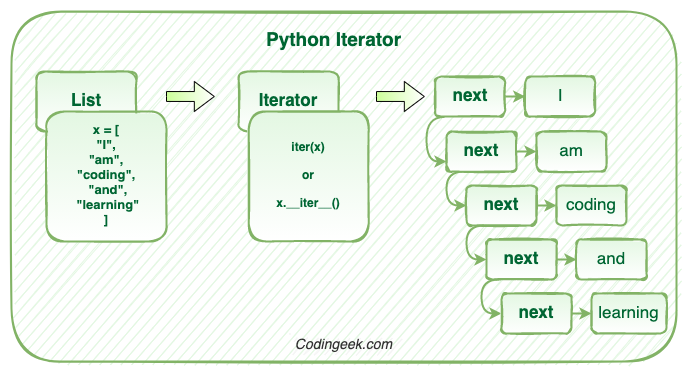

In [ ]:
test_ls = [100, 101, 102, 103, 104]


In [ ]:
dir(test_ls)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [ ]:
type(test_ls.__iter__())

list_iterator

In [ ]:
test_iter = test_ls.__iter__()  

In [ ]:
dir(test_iter)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__length_hint__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [ ]:
test_iter.__next__()

100

In [ ]:
test_iter.__next__()

101

In [ ]:
%timeit for i in int_ls: pass

46.6 ms ± 2.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit for i in int_ls[:10_000]: pass

359 µs ± 7.37 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
temp_ls = int_ls[:10_000]

%timeit for i in temp_ls: pass

197 µs ± 2.92 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
while i in [1,2,3]: pass

In [ ]:
%timeit while i in temp_ls: pass

263 µs ± 8.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%timeit while i in int_ls[:10_000]: pass

498 µs ± 156 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
# Long Running...

%timeit while i in int_ls: pass

KeyboardInterrupt: ignored

# Iterate over Different Datastructures

## Lists

In [ ]:
max_ct = 10
cur_ct = 0

for i in int_ls:
  if cur_ct >= max_ct:
    break
  else:
    print(f'#{cur_ct}: {i}')
    cur_ct = cur_ct + 1

#0: 885202
#1: 18204
#2: 519267
#3: 81893
#4: 884443
#5: 372302
#6: 2730
#7: 101192
#8: 356734
#9: 467292


In [ ]:
max_ct = 10
# cur_ct = 0

for idx, val in enumerate(int_ls):
  if idx >= max_ct:
    break
  else:
    print(f'#{idx}: {val}')
    # cur_ct = cur_ct + 1

#0: 885202
#1: 18204
#2: 519267
#3: 81893
#4: 884443
#5: 372302
#6: 2730
#7: 101192
#8: 356734
#9: 467292


In [ ]:
max_ct = 10
# cur_ct = 0

[val for idx, val in enumerate(int_ls) if idx < max_ct]

[885202, 18204, 519267, 81893, 884443, 372302, 2730, 101192, 356734, 467292]

## Dictionaries

In [ ]:
%whos dict

Variable   Type    Data/Info
----------------------------
int_dt     dict    n=1000000
words_dt   dict    n=25480


In [ ]:
max_ct = 10
cur_ct = 0

for key, values in int_dt.items():
  if cur_ct >= max_ct:
    break
  else:
    print(f'int_dt[{key}] : {values}')
    cur_ct = cur_ct + 1

int_dt[0] : 885202
int_dt[1] : 18204
int_dt[2] : 519267
int_dt[3] : 81893
int_dt[4] : 884443
int_dt[5] : 372302
int_dt[6] : 2730
int_dt[7] : 101192
int_dt[8] : 356734
int_dt[9] : 467292


## Pandas DataFrames

In [ ]:
max_ct = 10
cur_ct = 0

for i in range(len(int_df)):
  if cur_ct >= max_ct:
    break
  else:
    print(f'Row #{i}: {int_df.loc[i, "val"]}')
    cur_ct = cur_ct + 1
  

Row #0: 885202
Row #1: 18204
Row #2: 519267
Row #3: 81893
Row #4: 884443
Row #5: 372302
Row #6: 2730
Row #7: 101192
Row #8: 356734
Row #9: 467292


In [ ]:
max_ct = 10
cur_ct = 0

for i in range(len(int_df)):
  if cur_ct >= max_ct:
    break
  else:
    print(f'Row #{i}: {int_df.iloc[i].val}')
    cur_ct = cur_ct + 1

Row #0: 885202
Row #1: 18204
Row #2: 519267
Row #3: 81893
Row #4: 884443
Row #5: 372302
Row #6: 2730
Row #7: 101192
Row #8: 356734
Row #9: 467292


In [ ]:
max_ct = 10
cur_ct = 0

for idx, row in int_df.iterrows():
  if cur_ct >= max_ct:
    break
  else:
    print(f'Row #{idx}: {row["val"]}')
    cur_ct = cur_ct + 1

Row #0: 885202
Row #1: 18204
Row #2: 519267
Row #3: 81893
Row #4: 884443
Row #5: 372302
Row #6: 2730
Row #7: 101192
Row #8: 356734
Row #9: 467292


## Sets

In [ ]:
%whos set

Variable                  Type    Data/Info
-------------------------------------------
english_words_lower_set   set     {'amply', 'deprive', 'nav<...>', 'sistine', 'thickish'}


In [ ]:
max_ct = 10
# cur_ct = 0

for idx, val in enumerate(english_words_lower_set):
  if idx >= max_ct:
    break
  else:
    print(f'Row #{idx}: {val}')
    # cur_ct = cur_ct + 1

Row #0: amply
Row #1: deprive
Row #2: nave
Row #3: cocky
Row #4: furlong
Row #5: perky
Row #6: culture
Row #7: illusive
Row #8: workplace
Row #9: ditto


In [ ]:
# Convert to list

word_ls = [val for val in english_words_lower_set]
word_ls[:10]

['amply',
 'deprive',
 'nave',
 'cocky',
 'furlong',
 'perky',
 'culture',
 'illusive',
 'workplace',
 'ditto']

In [ ]:
[val for val in english_words_lower_set][:10]

['amply',
 'deprive',
 'nave',
 'cocky',
 'furlong',
 'perky',
 'culture',
 'illusive',
 'workplace',
 'ditto']

# Iterate over Lists

## Simple Iteration over Data Structure

In [ ]:
# Loop

len_intls_int = len(int_ls)

time_start = time.time()
%timeit for i in range(len_intls_int): pass
time_end = time.time()

time_dur = time_end - time_start
  
print(f'List Loop over {len_intls_int}')
print(f'     Time: {time_dur}')

In [ ]:
%%timeit

for i in range(len_intls_int):
  pass

In [ ]:
# List comprehension

%timeit _ = [x for x in int_ls]

## Operation over List

In [ ]:
int_cubed_ls = []

len_intls_int = len(int_ls)

time_start = time.time()
%timeit for i in range(len_intls_int): int_cubed_ls.append(int_ls[i]**3)
time_end = time.time()

time_dur = time_end - time_start
  
print(f'List Loop over {len_intls_int}')
print(f'     Time: {time_dur}')

In [ ]:
int_cubed_ls = []

len_intls_int = len(int_ls)

time_start = time.time()
%timeit int_cubed_ls = [x**3 for x in int_ls]
time_end = time.time()

time_dur = time_end - time_start
  
print(f'List Loop over {len_intls_int}')
print(f'     Time: {time_dur}')

In [ ]:
int_np = np.array(int_ls)

time_start = time.time()
%timeit int_cubed_np = np.power(int_np, 3)
time_end = time.time()

time_dur = time_end - time_start
  
print(f'List Loop over {len_intls_int}')
print(f'     Time: {time_dur}')

## Max in List

In [ ]:
max_best = 0

time_start = time.time()
for i in range(len(int_ls)):
  if int_ls[i] > max_best:
    max_best = int_ls[i]

time_end = time.time()
time_dur = time_end - time_start
  
print(f'Max value: {max_best}')
print(f'     Time: {time_dur}')

In [ ]:
time_start = time.time()
max_best = max(int_ls)
time_end = time.time()

time_dur = time_end - time_start
  
print(f'Max value: {max_best}')
print(f'     Time: {time_dur}')

## Find Max n in List

### Nested Loops

In [ ]:
biggest_ls = []
biggest_ct = 100

time_start = time.time()

# try-catch: len(int_ls) > biggest_ct

# for i in range(len(int_ls)):
for i, val_i in enumerate(int_ls):
  if len(biggest_ls) < biggest_ct:
    # haven't filled biggest_ls yet
    biggest_ls.append(val_i)
  else:
    # check if new value is larger than smallest value in biggest_ls

    # find smallest value in biggest_ls
    # alt: store in sorted order -> slower write, retrive faster
    smallest_big = biggest_ls[0]
    smallest_big_idx = 0
    for j, val_j in enumerate(biggest_ls):
      if val_j < smallest_big:
        smallest_big = val_j
        smallest_big_idx = j
    
    # if new value is larger than smallest big, replace
    if val_i  > smallest_big:
      biggest_ls[smallest_big_idx] = val_i

time_end = time.time()
time_dur = time_end - time_start
  
print(f'Max values: {biggest_ls}')
print(f'      Time: {time_dur}')

### Using HeapQ

In [ ]:
import heapq

In [ ]:
time_start = time.time()
biggest_ls = heapq.nlargest(100, int_ls)
time_end = time.time()

time_dur = time_end - time_start
  
print(f'Max values: {biggest_ls}')
print(f'      Time: {time_dur}')


In [ ]:
?sorted

In [ ]:
%time 
sorted(int_ls, reverse=True)[0]

In [ ]:
%time 

num_hi_int = 0
num_hi_idx_int = 0

for i in range(len(int_ls)-1):
  if num_hi_int < int_ls[i]:
    num_hi_int = int_ls[i] 
    num_hi_idx_int = i

print(f'Highest Number: {num_hi_int}')
print(f'Highest Number Index: {num_hi_idx_int}')


In [ ]:
%%time

for i in range(n):


# Looping

## Sum the numbers from 0 to n-1 in different ways

* https://www.youtube.com/watch?v=Qgevy75co8c

In [ ]:
import timeit

In [ ]:
def while_loop(n=100_000_000):
  i = 0 
  s = 0 
  # Loop in Python
  while i < n:
    s += 1
    i += 1 # Done in Python
  return s

def for_loop(n=100_000_000):
  s = 0 
  # Iteration, bounds checking done in C
  for i in range(n):
    s += 1 # Done in Python
  return s

In [ ]:
print('While Loop:\t\t',timeit.timeit(while_loop, number=1)) 
print('  For Loop:\t\t',timeit.timeit(for_loop, number=1))


In [ ]:
def for_loop_with_increment(n=100_000_000):
  s = 0
  for i in range(n):
    s += i
    i += i # Redundant
  return s 

def for_loop_with_test(n=100_000_000):
  s = 0
  for i in range(n):
    if i < n: pass
    s += i
  return s 

def for_loop_with_increment_and_test(n=100_000_000):
  s = 0
  for i in range(n):
    if i < n: pass
    i += 1
    s += 100_000_000
  return s



In [ ]:
print('While Loop:\t\t',timeit.timeit(while_loop, number=1)) 
print('  For Loop:\t\t',timeit.timeit(for_loop, number=1))

print('     For inc Loop:\t\t',timeit.timeit(for_loop_with_increment, number=1)) 
print('    For test Loop:\t\t',timeit.timeit(for_loop_with_test, number=1))
print('For inc+test Loop:\t\t',timeit.timeit(for_loop_with_increment_and_test, number=1)) 


## Built-Ins

In [ ]:
# Lazy build of array

def sum_range(n=100_000_000):
  return sum(range(n))

In [ ]:
print('  For Loop:\t\t',timeit.timeit(sum_range, number=1))

## Numpy

In [ ]:
import numpy as np

In [ ]:
# Build 100M array in memory

def sum_numpy(n=100_000_000):
  return np.sum(np.arange(n))

In [ ]:
print('  For Loop:\t\t',timeit.timeit(sum_numpy, number=1))

## Formula

In [ ]:
def sum_math(n=100_000_000):
  return (n * (n-1)) // 2

In [ ]:
print('  For Loop:\t\t',timeit.timeit(sum_math, number=1))

# Numba

* [Make Python 1000x Faster with One Line (6:50)](https://www.youtube.com/watch?v=OiMZtjSZVOw)


In [ ]:
from time import time, sleep
from numba import njit

In [ ]:
def f():
  l = []
  for x in range(10):
    for y in range(1000):
      for z in range(10000):
        if (x+y+z)/10 == x:
          l.append(x)
    print(x)
  return l

start = time()
f()
print(f"Finished after {round(time()-start,2)} seconds")

In [ ]:
# Cannot use many libraries numba is not aware of
# First time slower due to compilation

@njit
def f():
  l = []
  for x in range(10):
    for y in range(1000):
      for z in range(10000):
        if (x+y+z)/10 == x:
          l.append(x)
    print(x)
  return l

start = time()
f()
print(f"Finished after {round(time()-start,2)} seconds")

In [ ]:
# Cannot use many libraries numba is not aware of
# First time slower due to compilation

@njit
def f():
  l = []
  for x in range(10):
    for y in range(1000):
      for z in range(10000):
        if (x+y+z)/10 == x:
          l.append(x)
    print(x)
  return l

start = time()
for x in range(10000):
  f()
print(f"Finished after {round(time()-start,2)} seconds")

# JAX Crash Course

## Outline
- What is JAX?
- Speed comparison
- Replacement for NumPy
- Speed up computations with jit()
- Automatic Differentiation with grad()
- Automatic Vectorization with vmap()
- Automatic Parallelization with pmap()
- Example Training Loop With JAX
- What's the catch?
- Summary

## Resources:
- [JAX Performance Tutorial - YouTube](https://www.youtube.com/watch?v=juo5G3t4qAo
- [Official JAX Website](https://jax.readthedocs.io/en/latest/index.html)
- [Why You Should (or Shouldn't) be Using Google's JAX in 2022](https://www.assemblyai.com/blog/why-you-should-or-shouldnt-be-using-jax-in-2022/)

## Transcribed:

- 01 Oct 2022 by Jon Chun

## What is JAX?
JAX is Autograd and [XLA](https://www.tensorflow.org/xla), brought together for high-performance numerical computing and machine learning research. It provides composable transformations of Python+NumPy programs: differentiate, vectorize, parallelize, Just-In-Time compile to GPU/TPU, and more.

In simpler words: JAX is NumPy on the CPU, GPU, and TPU, with great automatic differentiation for high-performance machine learning research.

#### XLA
XLA: Accelerated Linear Algebra, lies at the foundation of what makes JAX so powerful. Developed by Google, XLA is a domain-specific, graph-based, just-in-time compiler for linear algebra.

It significantly improves execution speed and lowers memory usage by fusing low-level operations.


## Speed Comparison
Huge performance boost when running on GPU/TPU, but even on CPU!

In [ ]:
import numpy as np

def fn(x):
  return x + x*x + x*x*x

x = np.random.randn(10000, 10000).astype(dtype='float32')
%timeit -n5 fn(x)

In [ ]:
import jax.numpy as jnp
from jax import jit

jax_fn = jit(fn)
x = jnp.array(x)
%timeit -n5 jax_fn(x).block_until_ready()
# Use block_until_ready because JAX uses asynchronous execution by default

## Drop-in Replacement for NumPy
JAX numpy can often be used as drop-in repcacement for numpy since the API is almost identical. One useful feature of JAX is that the same code can be run on different backends – CPU, GPU and TPU.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_np = np.linspace(0, 10, 1000)
y_np = 2 * np.sin(x_np) * np.cos(x_np)
plt.plot(x_np, y_np)

In [ ]:
import jax.numpy as jnp

x_jnp = jnp.linspace(0, 10, 1000)
y_jnp = 2 * jnp.sin(x_jnp) * jnp.cos(x_jnp)
plt.plot(x_jnp, y_jnp)

Using this alone can bring a nice performance boost on the GPU/TPU.

**Big difference: JAX arrays are immutable!**

In [ ]:
x = np.arange(10)
x[0] = 10
x

In [ ]:
x = jnp.arange(10)
x[0] = 10

## Speed up computations with jit()
Just-in-time, or JIT compilation, is a method of executing code that lies between interpretation and ahead-of-time (AoT) compilation.

The important fact is that a JIT-compiler will compile code at runtime into a fast executable (at the cost of a slower first run).

In [ ]:
def fn(x):
  return x + x*x + x*x*x

x_np = np.random.randn(5000, 5000).astype(dtype='float32')
%timeit -n5 fn(x_np)

x_jnp = jnp.array(x_np)
%timeit -n5 fn(x_jnp).block_until_ready()

jitted = jit(fn)
%timeit -n5 jitted(x_jnp).block_until_ready()

In [ ]:
# Use as decorator
@jit
def fn_jitted(x):
  return x + x*x + x*x*x

%timeit -n5 fn_jitted(x_jnp).block_until_ready()

## How does JIT works?

JIT and other JAX transforms work by tracing a function to determine its effect on inputs of a specific shape and type.

In [ ]:
@jit
def f(x, y):
  print("Running f():")
  print(f"  x = {x}")
  print(f"  y = {y}")
  result = jnp.dot(x + 1, y + 1)
  print(f"  result = {result}")
  return result

x = np.random.randn(3, 4)
y = np.random.randn(4)

In [ ]:
f(x, y)

In [ ]:
f(x, y)

Notice that the print statements execute, but rather than printing the data we passed to the function, though, it prints tracer objects that stand-in for them.

These tracer objects are what jax.jit uses to extract the sequence of operations specified by the function. Basic tracers are stand-ins that encode the shape and dtype of the arrays, but are agnostic to the values. This recorded sequence of computations can then be efficiently applied within XLA to new inputs with the same shape and dtype, without having to re-execute the Python code.

When we call the compiled function again on matching inputs, no re-compilation is required and nothing is printed because the result is computed in compiled XLA rather than in Python.

## Limitation of JIT
**Important**: because JIT compilation is done without information on the content of the array, control flow statements in the function cannot depend on traced values.

In [ ]:
# Important: because JIT compilation is done without information
# on the content of the array, control flow statements in the function cannot depend
# on traced values
def f(x):
  if x > 0:
    return x
  else:
    return 2 * x

f_jit = jit(f)
f_jit(10)  # Should raise an error. 

## Pure Functions
It needs [pure functions](https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html#pure-functions):

- No control flow statements that depend on values
- It cannot use or change global state (variables outside its scope, global variables)
- It cannot have an I/O stream - so no printing, asking for input, or accessing the time
- It cannot have a mutable function as an argument (which a concurrent process could modify)

#### Untracked side effects!
Silently throw off the results of your calculation you should be sure that you understand how to write pure functions if you plan to utilize JAX. Read more [here](https://jax.readthedocs.io/en/latest/faq.html#jit-changes-the-behavior-of-my-function).

## Automatic Differentiation with grad()

Very simple to calculate gradients and second/third order gradients etc.

The gradients follow more the underlying math rather than using backpropagation in other Deep Learning libraries --> It can be much faster with JAX!

grad() works for scalar-valued function, meaning a function which maps scalars/vectors to scalars.

In [ ]:
from jax import grad

def f(x):
  return x**3 + 2*x**2 - 3*x + 1

dfdx = grad(f)

d2fdx = grad(grad(f))
#d2fdx = grad(dfdx)

print(f"x = 1.0")
print(f"f  (x) = {f(1.)}")
print(f"f' (x) = 3*x^2 + 4x - 3 = {dfdx(1.)}")
print(f"f''(x) = 6x + 4 = {d2fdx(1.)}")

In [ ]:
# Another example
def rectified_cube(x):
  r = 1
  
  if x < 0.:
    for i in range(3):
      r *= x
    r = -r
  else:
    for i in range(3):
        r *= x
  
  return r

gradient_function = grad(rectified_cube)

print(f"x = 2   f(x) = {rectified_cube(2.)}   f'(x) =  3*x^2 = {gradient_function(2.)}")
print(f"x = -3  f(x) = {rectified_cube(-3.)}  f'(x) = -3*x^2 = {gradient_function(-3.)}")

In [ ]:
# use argnum
def sum_squared_error(x, y):
  return jnp.sum((x-y)**2)

sum_squared_error_dx = grad(sum_squared_error)

x = jnp.asarray([1.0, 2.0, 3.0, 4.0])
y = jnp.asarray([1.1, 2.1, 3.1, 4.1])

print(sum_squared_error_dx(x, y))

sum_squared_error_dy = grad(sum_squared_error, argnums=(1))

print(sum_squared_error_dy(x, y))

## Jacobian and Hessian for Vector-Valued Functions
For vector-valued functions which map vectors to vectors, the analogue to the gradient is the Jacobian. With the function transformations jacfwd() and jacrev(), corresponding to forward mode differentiation and reverse mode differentiation.

In [ ]:
from jax import jacfwd

def mapping(v):
  x = v[0]
  y = v[1]
  z = v[2]
  return jnp.array([x*x, y*z])

# 3 inputs, 2 outputs
# [d/dx x^2 , d/dy x^2, d/dz x^2]
# [d/dx y*z , d/dy y*z, d/dz y*z]

# [2*x , 0, 0]
# [0 , z, y]

f = jacfwd(mapping)
v = jnp.array([4., 5., 9.])
print(f(v))

In [ ]:
def hessian(f):
  return jacfwd(grad(f))

def f(x):
  return jnp.dot(x, x)

hessian(f)(jnp.array([1., 2., 3.]))

## Automatic Vectorization with vmap()

JAX’s transform: Vectorization via vmap, the vectorizing map. It has the familiar semantics of mapping a function along array axes, but instead of keeping the loop on the outside, it pushes the loop down into a function’s primitive operations for better performance.

In [ ]:
from jax import vmap

x = jnp.arange(5)
w = jnp.array([2., 3., 4.])

def convolve(x, w):
  output = []
  for i in range(1, len(x)-1):
    output.append(jnp.dot(x[i-1:i+2], w))
  return jnp.array(output)

print(convolve(x, w))

# Suppose we would like to apply this function to a batch of weights w to a batch of vectors x.
xs = jnp.stack([x, x])
ws = jnp.stack([w, w])

# The most naive option would be to simply loop over the batch in Python:
def manually_batched_convolve(xs, ws):
  output = []
  for i in range(xs.shape[0]):
    output.append(convolve(xs[i], ws[i]))
  return jnp.stack(output)

print(manually_batched_convolve(xs, ws))

# use vmap
auto_batch_convolve = vmap(convolve)

print(auto_batch_convolve(xs, ws))

## Automatic Parallelization with pmap()
Performing distributed training of SPMD programs with a single command

Consider the example of vector-matrix multiplication. Let’s say we are performing this computation by sequentially computing the dot product of the vector with each row of the matrix. We would need to push these computations through our hardware one at a time.

With JAX, we can easily distribute these computations across 4 TPUs by simply wrapping our operation in pmap(). This allows us to concurrently perform one dot product on each TPU, significantly increasing our computation speed (for large computations)

## Example Training Loop with JAX


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=0.1, size=(100,))
ys = xs * 3 - 1 + noise

plt.scatter(xs, ys)

In [ ]:
def model(theta, x):
  """Computes wx + b on a batch of input x."""
  w, b = theta
  return w * x + b

def loss_fn(theta, x, y):
  prediction = model(theta, x)
  return jnp.mean((prediction-y)**2)

def update(theta, x, y, lr=0.1):
  return theta - lr * grad(loss_fn)(theta, x, y)

In [ ]:
theta = jnp.array([1., 1.])

for _ in range(1000):
  theta = update(theta, xs, ys)

plt.scatter(xs, ys)
plt.plot(xs, model(theta, xs))

w, b = theta
print(f"w: {w:<.2f}, b: {b:<.2f}")
print(f"f(x) = {w:<.2f} * x {b:<.2f}")

## What's the catch

- Functional Paradigm: Needs pure functions
- Untracked side effects
- Inability to modify arrays
- Explicit [PRNG handling](https://jax.readthedocs.io/en/latest/jax.random.html#prng-keys). Unlike the stateful pseudorandom number generators (PRNGs) that users of NumPy and SciPy may be accustomed to, JAX random functions all require an explicit PRNG state to be passed as a first argument. --> Be careful when you want to reproduce results.

## Conclusion

JAX is a very promising project and has been steadily growing in popularity, despite the learning curve introduced by its functional paradigm.

- Easy to use as drop-in replacement for numpy
- Autograd is extremelty useful for scientific computing
- Deep Learning projects can benefit from this!
- Huge performance improvement possible!!
- But be careful and make sure to understand pure functions and how jit works
- JAX is still officially considered an experimental framework. 